# Parkinsons Disease
The objective is to find a model which will be able to predict whether a person is likely to have parkinsons disease or not given their medical records. 
___

## Model Performamce
Accuracy, F1-Score and Recall were the metrics used to evaluate the performance of the model

| Method    |  Accuracy (%)  | F1-Score (%) | Recall (%) |
|-----------|---------|-----------|---------|
| **Random Forest**   | **97.44**   | **98.41** | **100.00** |
| XGBoost | 89.74   | 93.94 | **100.00** |
| SVM | 89.74   | 93.33 | 90.32 |
___

### Steps to Solve Problem
* Import Dataset and Libraries
* Data Preprocessing
    * Train / Test Data split
    * Missing Data Imputation
    * Outlier Handling
    * Feature Scaling
    * Imbalanced Data
* Model Build
    * Model Initiation and Fitting
    * Test predictions
* Model Perfromance
    * Recall
    * Case Prediction
        


### Import Libraries and Dataset

In [1]:
import pandas as pd # for data manipulation
import numpy as np # for numerical analysis

# For plottling graphs
import seaborn as sns 
import matplotlib.pyplot as plt

# for saving tools
import joblib

In [2]:
# Setting Plotting Settings
%matplotlib inline
sns.set_style("darkgrid")

Import Dataset

In [3]:
parkinsons = pd.read_csv("parkinsons.csv")

In [4]:
# Checking First 5 rows of data
parkinsons.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Checking basic information about the dataset

In [5]:
parkinsons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
parkinsons.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

### Data Preprocessing

#### Data Shuffle and Split
It is good pratice to split the dataset before preprocessing to avoid data leakage, shuffling the data adds randomness which can boost model performance

In [7]:
# Shuffling the data
parkinsons = parkinsons.sample(frac=1, random_state=42).copy()

In [8]:
# Splitting the data into train and test data
from sklearn.model_selection import train_test_split
X = parkinsons.drop(["name", "status"], axis=1) 
y = parkinsons["status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

In [9]:
# Setting the train data to variable name "parkinsons" for data preprocessing
parkinsons = X_train.copy()
parkinsons

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
110,200.714,223.982,89.686,0.00621,0.00003,0.00371,0.00337,0.01112,0.02286,0.207,...,0.01852,0.03576,0.00704,23.239,0.436084,0.727863,-5.258320,0.256454,2.550961,0.232520
38,180.198,201.249,175.456,0.00284,0.00002,0.00153,0.00166,0.00459,0.01444,0.131,...,0.01190,0.02177,0.00231,26.738,0.403884,0.766209,-6.452058,0.212294,2.269398,0.141929
149,202.632,565.740,177.258,0.01627,0.00008,0.00919,0.00963,0.02756,0.07170,0.833,...,0.06460,0.10546,0.07889,14.989,0.427627,0.775708,-4.892495,0.262281,2.910213,0.270173
111,208.519,220.315,199.020,0.00609,0.00003,0.00368,0.00339,0.01105,0.01761,0.155,...,0.01307,0.02855,0.00830,22.407,0.338097,0.712466,-6.471427,0.184378,2.502336,0.136390
119,217.116,233.481,93.978,0.00404,0.00002,0.00127,0.00128,0.00381,0.01299,0.124,...,0.01075,0.02038,0.00681,24.581,0.462516,0.582710,-5.517173,0.389295,2.925862,0.220657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,145.174,198.109,80.637,0.00733,0.00005,0.00414,0.00422,0.01242,0.02362,0.233,...,0.01944,0.03706,0.01874,18.857,0.637518,0.735546,-5.594275,0.127950,1.765957,0.222716
103,150.258,154.609,75.349,0.00248,0.00002,0.00105,0.00136,0.00315,0.01131,0.107,...,0.01009,0.01567,0.00495,26.759,0.296888,0.722356,-6.878393,0.089267,2.004055,0.113942
13,139.173,179.139,76.556,0.00390,0.00003,0.00165,0.00208,0.00496,0.01642,0.154,...,0.01797,0.02184,0.01041,24.889,0.430166,0.665833,-5.660217,0.254989,2.519422,0.199889
69,148.090,162.824,67.343,0.00762,0.00005,0.00467,0.00354,0.01400,0.05428,0.497,...,0.03635,0.10070,0.02431,21.718,0.487407,0.727313,-6.261141,0.120956,2.137075,0.141958


In [10]:
y_train

110    1
38     1
149    1
111    1
119    1
      ..
125    1
103    1
13     1
69     1
51     0
Name: status, Length: 156, dtype: int64

In [11]:
parkinsons.iloc[0]

MDVP:Fo(Hz)         200.714000
MDVP:Fhi(Hz)        223.982000
MDVP:Flo(Hz)         89.686000
MDVP:Jitter(%)        0.006210
MDVP:Jitter(Abs)      0.000030
MDVP:RAP              0.003710
MDVP:PPQ              0.003370
Jitter:DDP            0.011120
MDVP:Shimmer          0.022860
MDVP:Shimmer(dB)      0.207000
Shimmer:APQ3          0.011920
Shimmer:APQ5          0.014390
MDVP:APQ              0.018520
Shimmer:DDA           0.035760
NHR                   0.007040
HNR                  23.239000
RPDE                  0.436084
DFA                   0.727863
spread1              -5.258320
spread2               0.256454
D2                    2.550961
PPE                   0.232520
Name: 110, dtype: float64

#### Handling of Missing data 


In [12]:
# Extracting features
features = [feature for feature in parkinsons.columns]

There is no missing data in this dataset

In [13]:
# Check total of missing values
parkinsons.isna().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

#### Feature Scaling
Scaling values to a range of -3 to 3, so as to boost model perfomance

In [14]:
# import library for scaling
from sklearn.preprocessing import StandardScaler

In [15]:
# initialize and scale values
scaler = StandardScaler()
scaler.fit(parkinsons[features])
parkinsons[features] = scaler.transform(parkinsons[features])

In [16]:
joblib.dump(scaler, "tools/scaler_joblib")

['tools/scaler_joblib']

### Class Imbalance

In [17]:
#  Ratio of No Parkinson to Parkinson
y_train.value_counts(normalize=True)

status
1    0.74359
0    0.25641
Name: proportion, dtype: float64

In [18]:
# joining the data together
parkinsons = pd.concat([parkinsons, y_train], axis=1)

In [19]:
# Balancing the data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=51)
X = parkinsons.drop("status", axis=1) 
y = parkinsons["status"]
X_train, y_train = smote.fit_resample(X, y)

In [20]:
#  Ratio of No Diabetes to Diabetes
y_train.value_counts(normalize=True)

status
1    0.5
0    0.5
Name: proportion, dtype: float64

### Model Building

#### Preprocessing Test data

In [21]:
X_test[features] = scaler.transform(X_test[features]) # scaling features

In [22]:
# checking first 5 rows of data
X_test.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
178,-0.151432,-0.447968,0.531967,-0.627798,-0.672123,-0.581369,-0.560485,-0.581443,-0.705749,-0.689308,...,-0.619726,-0.677014,-0.479478,0.519697,-0.883598,0.798224,-0.550574,-0.517415,-0.323720,-0.483962
171,-1.039602,-0.700585,-0.238230,-0.537601,-0.392743,-0.536514,-0.546879,-0.535520,-0.818315,-0.754158,...,-0.717257,-0.846283,-0.491718,0.958974,-0.782484,0.693933,-0.561047,-0.078752,-0.470999,-0.483204
137,-1.024432,-0.731969,-0.354934,-0.249362,-0.113364,-0.244957,-0.131912,-0.243967,1.225079,0.976850,...,1.010606,1.308839,0.260061,-1.143867,1.220770,-0.169468,0.952868,0.947541,0.742242,0.751637
15,-0.313735,0.149539,-0.760321,-0.510150,-0.392743,-0.565350,-0.502661,-0.565423,-0.742750,-0.769124,...,-0.590870,-0.742018,-0.398410,0.685294,0.659299,-1.073972,0.331183,-0.183522,-0.440262,0.320589
157,-0.906877,-0.692143,-0.352990,2.321258,2.959811,2.510423,1.249044,2.510302,1.033820,0.787287,...,0.307688,1.032409,1.890187,-0.638612,1.269749,-1.279736,2.051050,0.936787,1.482436,0.609947


In [23]:
X_test.shape

(39, 22)

#### Random Forest

Import Model

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
model = RandomForestClassifier(random_state=51, n_jobs=-1)

Train model and make predictions

In [26]:
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=51)

In [27]:
predictions = model.predict(X_test)

#### RF Performance

In [28]:
# libraries to check performance
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,  recall_score

In [29]:
print(f"The accuracy is {accuracy_score(y_test, predictions) * 100:.2f} %")
print(f"The f1 score is {f1_score(y_test, predictions) * 100:.2f} %") 
print(f"The recall is {recall_score(y_test, predictions) * 100:.2f} %")

The accuracy is 97.44 %
The f1 score is 98.41 %
The recall is 100.00 %


Confusion matrix

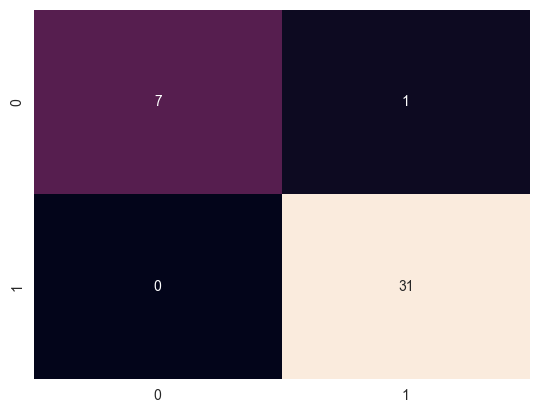

In [30]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cbar=False);
# TN   FP
# FN*   TP - Recall

XGboost

Import Model

In [31]:
from xgboost import XGBClassifier

In [32]:
xgb = XGBClassifier(random_state=51)

Train model and make predictions

In [33]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=51, ...)

In [34]:
predictions = xgb.predict(X_test)

#### XGBoost Performance

In [35]:
print(f"The accuracy is {accuracy_score(y_test, predictions) * 100:.2f} %")
print(f"The f1 score is {f1_score(y_test, predictions) * 100:.2f} %") 
print(f"The recall is {recall_score(y_test, predictions) * 100:.2f} %")

The accuracy is 89.74 %
The f1 score is 93.94 %
The recall is 100.00 %


Confusion Matrix

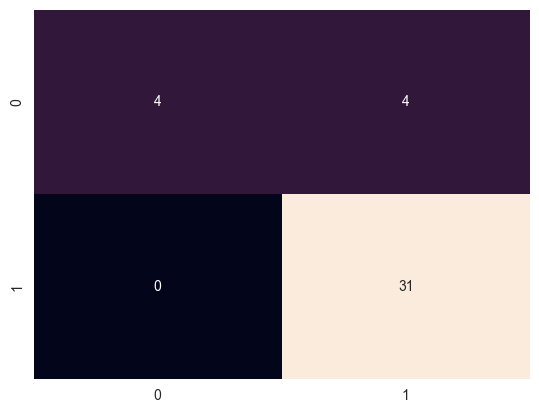

In [36]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cbar=False);
# TN   FP
# FN*   TP - Recall

### SVM

Import Model

In [37]:
from sklearn.svm import SVC

In [38]:
svm = SVC()

Train model and make predictions

In [39]:
svm.fit(X_train, y_train)

SVC()

In [40]:
predictions = svm.predict(X_test)

#### SVM Performance

In [41]:
print(f"The accuracy is {accuracy_score(y_test, predictions) * 100:.2f} %")
print(f"The f1 score is {f1_score(y_test, predictions) * 100:.2f} %") 
print(f"The recall is {recall_score(y_test, predictions) * 100:.2f} %")

The accuracy is 89.74 %
The f1 score is 93.33 %
The recall is 90.32 %


Confusion Matrix

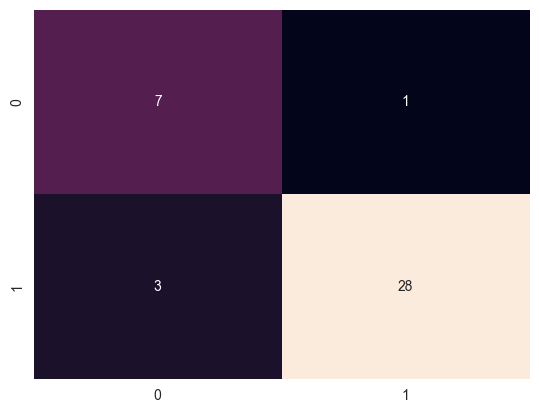

In [42]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cbar=False);
# TN   FP
# FN*   TP - Recall

### Most important features
Here we check the top 10 most important features that contribute to the prediction of parkinsons
* spread1
* MDVP:Fo(Hz)
* PPE
* MDVP:Fhi(Hz)
* spread2
* MDVP:APQ
* MDVP:Flo(Hz)
* Shimmer:APQ5
* MDVP:PPQ
* MDVP:Shimmer


In [43]:
importance_df = pd.DataFrame({
    "Feature" : features,
    "Importance" : model.feature_importances_}).sort_values("Importance", ascending=False)

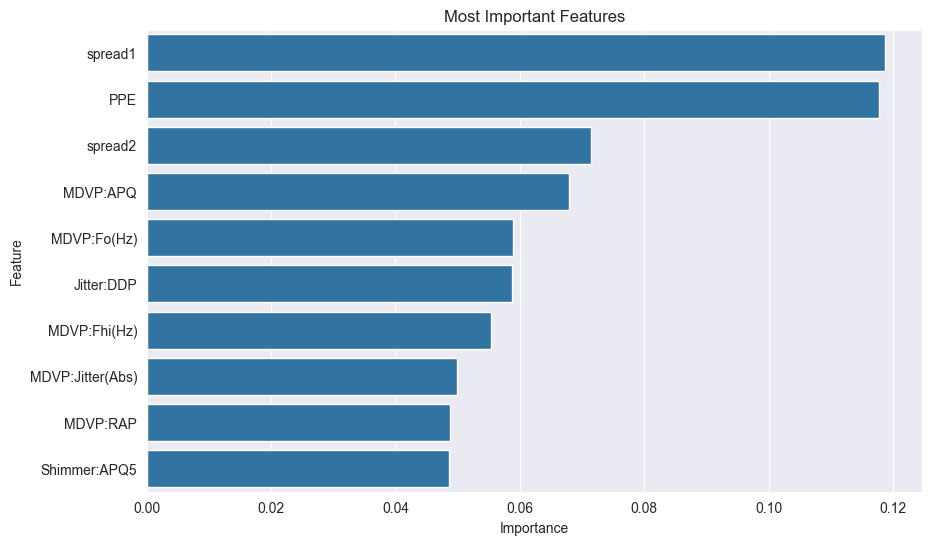

In [44]:
plt.figure(figsize=[10,6])
plt.title("Most Important Features")
sns.barplot(data=importance_df.head(10), y="Feature", x="Importance");

### Saving The Model

Random Forest had the best recall and F1 score so that would be our final model

In [45]:
joblib.dump(model, "tools/model_joblib")

['tools/model_joblib']